<H1>Vehicles in Finland</H1>

This project is analyzing the registered vehicles in Finland. Dataset is from Trafi https://www.traficom.fi/fi/ajankohtaista/avoin-data?toggle=Ajoneuvojen%20avoin%20data%205.13. Variables are explained in other file Ajoneuvotiedot_avoin_data_luokitukset_28.01.2021.xls


In [1]:
#importing libraries we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#dataset is loaded from Trafi's open datasite as zipped csv-file. Using the previous dataset (from 2020) for comparison too.

In [2]:
#read the data
def read_dataset(filename, separ):
    return pd.read_csv(filename, sep=separ, low_memory = False)

raw_data = read_dataset("TieliikenneAvoinData_5_13.csv", ";")

raw_data.tail(5)


,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,variantti,versio,kayttoonottopvm,vari,ovienLukumaara,korityyppi,...,vaihteidenLkm,kaupallinenNimi,voimanvalJaTehostamistapa,tyyppihyvaksyntanro,yksittaisKayttovoima,kunta,Co2,matkamittarilukema,valmistenumero2,jarnro
5121142,T1,2020-12-31,929.0,1.0,76505K140F00,NaN,20201231,NaN,2.0,NaN,...,NaN,FENDT 724 VARIO,2.0,e1*167/2013*00273*00,02,420.0,NaN,NaN,NaN,5121143
5121143,M1,2020-12-31,NaN,1.0,VACCPWAX0,FM6FM6AJ009G7MMON1VL74VR2,20150814,9,5.0,AC,...,6.0,GOLF,5.0,e1*2007/46*0627*14,13,186.0,94.0,109538.0,WVWZZZAUZG,5121144
5121144,O2,2020-12-31,13.0,5.0,ANP,270,20201231,NaN,NaN,DC,...,NaN,C2700,8.0,e4*2007/46*0274*06,NaN,202.0,NaN,NaN,NaN,5121145
5121145,O2,2020-12-31,13.0,5.0,NaN,NaN,20201231,NaN,NaN,DC,...,NaN,Eagle 5000,8.0,NaN,NaN,846.0,NaN,NaN,NaN,5121146
5121146,N1,2020-12-31,74.0,1.0,BKRA2ACX,G3MBCSAACAGHA,20190927,9,5.0,BB,...,6.0,TRANSIT,5.0,e1*2007/46*1100*12,02,179.0,NaN,28298.0,NaN,5121147


In [3]:
#lets see what kind of data we have
print(len(raw_data))
raw_data.describe()

5121147


,ajoneuvoryhma,ajoneuvonkaytto,kayttoonottopvm,ovienLukumaara,ohjaamotyyppi,istumapaikkojenLkm,omamassa,teknSuurSallKokmassa,tieliikSuurSallKokmassa,ajonKokPituus,...,iskutilavuus,suurinNettoteho,sylintereidenLkm,sahkohybridinluokka,vaihteidenLkm,voimanvalJaTehostamistapa,kunta,Co2,matkamittarilukema,jarnro
count,2.220690e+06,5.118780e+06,5.121147e+06,2.000290e+06,877384.000000,4.002241e+06,5.108321e+06,4.625375e+06,3.197434e+06,4.487045e+06,...,3.993023e+06,3.568095e+06,3.529707e+06,121097.000000,1.743278e+06,4.167800e+06,5.121090e+06,2.546706e+06,2.776312e+06,5.121147e+06
mean,1.229783e+02,1.150773e+00,2.000769e+07,4.116740e+00,1.940398,4.130834e+00,1.602662e+03,2.803375e+03,2.833969e+03,4.618558e+03,...,2.121884e+03,9.393813e+01,3.917846e+00,1.622072,5.997244e+00,5.040240e+00,4.342427e+02,1.562626e+02,2.056303e+05,2.560574e+06
std,2.033854e+02,7.673356e-01,8.597438e+05,8.268831e-01,1.381710,2.482750e+00,2.485471e+03,5.373251e+03,5.716597e+03,1.542978e+03,...,7.028230e+03,5.091671e+01,3.761559e+00,0.485059,3.022547e+00,2.314670e+00,2.859295e+02,3.998296e+01,1.095331e+06,1.478348e+06
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00,-2.882100e+04,1.000000e+00
25%,1.000000e+01,1.000000e+00,1.999083e+07,4.000000e+00,1.000000,3.000000e+00,4.700000e+02,1.370000e+03,7.500000e+02,4.146000e+03,...,1.390000e+03,7.100000e+01,4.000000e+00,1.000000,5.000000e+00,5.000000e+00,1.670000e+02,1.270000e+02,9.676000e+04,1.280288e+06
50%,2.100000e+01,1.000000e+00,2.007050e+07,4.000000e+00,1.000000,5.000000e+00,1.345000e+03,1.840000e+03,1.710000e+03,4.520000e+03,...,1.798000e+03,8.800000e+01,4.000000e+00,2.000000,6.000000e+00,5.000000e+00,4.100000e+02,1.530000e+02,1.775290e+05,2.560574e+06
75%,1.090000e+02,1.000000e+00,2.014012e+07,5.000000e+00,4.000000,5.000000e+00,1.671000e+03,2.210000e+03,2.160000e+03,4.820000e+03,...,2.200000e+03,1.100000e+02,4.000000e+00,2.000000,6.000000e+00,5.000000e+00,6.940000e+02,1.790000e+02,2.673672e+05,3.840860e+06
max,9.440000e+02,6.000000e+00,2.021010e+07,5.600000e+01,4.000000,9.100000e+01,9.539560e+05,9.282000e+05,6.800000e+05,4.434000e+05,...,6.700000e+06,1.612000e+04,6.138000e+03,4.000000,3.636000e+03,1.700000e+01,9.990000e+02,2.850000e+03,1.386690e+09,5.121147e+06


In [4]:
cols = raw_data.columns
cols

Index(['ajoneuvoluokka', 'ensirekisterointipvm', 'ajoneuvoryhma',
       'ajoneuvonkaytto', 'variantti', 'versio', 'kayttoonottopvm', 'vari',
       'ovienLukumaara', 'korityyppi', 'ohjaamotyyppi', 'istumapaikkojenLkm',
       'omamassa', 'teknSuurSallKokmassa', 'tieliikSuurSallKokmassa',
       'ajonKokPituus', 'ajonLeveys', 'ajonKorkeus', 'kayttovoima',
       'iskutilavuus', 'suurinNettoteho', 'sylintereidenLkm', 'ahdin',
       'sahkohybridi', 'sahkohybridinluokka', 'merkkiSelvakielinen',
       'mallimerkinta', 'vaihteisto', 'vaihteidenLkm', 'kaupallinenNimi',
       'voimanvalJaTehostamistapa', 'tyyppihyvaksyntanro',
       'yksittaisKayttovoima', 'kunta', 'Co2', 'matkamittarilukema',
       'valmistenumero2', 'jarnro'],
      dtype='object')

In [5]:
#checking how many NaNs in each column
raw_data.isna().sum()

ajoneuvoluokka                     0
ensirekisterointipvm          175203
ajoneuvoryhma                2900457
ajoneuvonkaytto                 2367
variantti                    2273937
versio                       1982070
kayttoonottopvm                    0
vari                         1859631
ovienLukumaara               3120857
korityyppi                   2121177
ohjaamotyyppi                4243763
istumapaikkojenLkm           1118906
omamassa                       12826
teknSuurSallKokmassa          495772
tieliikSuurSallKokmassa      1923713
ajonKokPituus                 634102
ajonLeveys                    341127
ajonKorkeus                  1824203
kayttovoima                  1111894
iskutilavuus                 1128124
suurinNettoteho              1553052
sylintereidenLkm             1591440
ahdin                        2650177
sahkohybridi                 3544306
sahkohybridinluokka          5000050
merkkiSelvakielinen             1797
mallimerkinta                 747146
v

#Note: there are lots of NaNs in ensirekisterointipvm, 175203 -> if ensirekisterointipvm = Nan and kayttoonottopvm Nan or 0, this is problematic when counting stats


In [6]:
#How many registered vehicles we have?
print(f"{len(raw_data)} registered vehicles in Finland after 2020")
#print(f"{len(raw_data_prev)} registered vehicles in Finland after 2019")
#print(f"Difference between 2020 and 2019 is {len(raw_data)-len(raw_data_prev)} vehicles")
raw_data.head()

5121147 registered vehicles in Finland after 2020


,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,variantti,versio,kayttoonottopvm,vari,ovienLukumaara,korityyppi,...,vaihteidenLkm,kaupallinenNimi,voimanvalJaTehostamistapa,tyyppihyvaksyntanro,yksittaisKayttovoima,kunta,Co2,matkamittarilukema,valmistenumero2,jarnro
0,MUU,NaN,21.0,1.0,NaN,NaN,19670000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,01,91.0,NaN,NaN,NaN,1
1,MUU,1976-09-01,13.0,1.0,NaN,NaN,19760000,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,475.0,NaN,NaN,NaN,2
2,M1,1984-07-09,NaN,1.0,NaN,NaN,19840000,1,NaN,NaN,...,NaN,FIESTA,5.0,NaN,01,179.0,NaN,NaN,NaN,3
3,MUU,1983-09-22,13.0,1.0,NaN,NaN,19830000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,734.0,NaN,NaN,NaN,4
4,O1,1994-02-09,1.0,1.0,NaN,NaN,19940209,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,761.0,NaN,NaN,NaN,5


In [7]:
#tracking the year of registration from column ensirekisterointipvm, changing the year to numeric

def pick_the_year(data):
    data["year"] = data["ensirekisterointipvm"].str.slice(stop=4)
    data["kayttoonottopvm"] = (data["kayttoonottopvm"]/10000).map(int)
    data["year"] = data["year"].map(float)
    return data

raw_data=pick_the_year(raw_data)
raw_data.head()


,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,variantti,versio,kayttoonottopvm,vari,ovienLukumaara,korityyppi,...,kaupallinenNimi,voimanvalJaTehostamistapa,tyyppihyvaksyntanro,yksittaisKayttovoima,kunta,Co2,matkamittarilukema,valmistenumero2,jarnro,year
0,MUU,NaN,21.0,1.0,NaN,NaN,1967,NaN,NaN,NaN,...,NaN,NaN,NaN,01,91.0,NaN,NaN,NaN,1,NaN
1,MUU,1976-09-01,13.0,1.0,NaN,NaN,1976,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,475.0,NaN,NaN,NaN,2,1976.0
2,M1,1984-07-09,NaN,1.0,NaN,NaN,1984,1,NaN,NaN,...,FIESTA,5.0,NaN,01,179.0,NaN,NaN,NaN,3,1984.0
3,MUU,1983-09-22,13.0,1.0,NaN,NaN,1983,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,734.0,NaN,NaN,NaN,4,1983.0
4,O1,1994-02-09,1.0,1.0,NaN,NaN,1994,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,761.0,NaN,NaN,NaN,5,1994.0


In [8]:

#there are Nans in kayttoonottopvm, so let's fix this by attaching the ensirekisterointipvm if kayttoonottopvm is nan

def fillnans_with_col(data, colnan, colfill):
    data[colnan] = data[colnan].fillna(data[colfill])
    return data
    
raw_data = fillnans_with_col(raw_data, "year", "kayttoonottopvm")
raw_data.head()

,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,variantti,versio,kayttoonottopvm,vari,ovienLukumaara,korityyppi,...,kaupallinenNimi,voimanvalJaTehostamistapa,tyyppihyvaksyntanro,yksittaisKayttovoima,kunta,Co2,matkamittarilukema,valmistenumero2,jarnro,year
0,MUU,NaN,21.0,1.0,NaN,NaN,1967,NaN,NaN,NaN,...,NaN,NaN,NaN,01,91.0,NaN,NaN,NaN,1,1967.0
1,MUU,1976-09-01,13.0,1.0,NaN,NaN,1976,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,475.0,NaN,NaN,NaN,2,1976.0
2,M1,1984-07-09,NaN,1.0,NaN,NaN,1984,1,NaN,NaN,...,FIESTA,5.0,NaN,01,179.0,NaN,NaN,NaN,3,1984.0
3,MUU,1983-09-22,13.0,1.0,NaN,NaN,1983,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,734.0,NaN,NaN,NaN,4,1983.0
4,O1,1994-02-09,1.0,1.0,NaN,NaN,1994,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,761.0,NaN,NaN,NaN,5,1994.0


In [9]:
raw_data = raw_data[raw_data["kayttoonottopvm"].notna()]
raw_data = raw_data[raw_data["year"].notna()]
len(raw_data) #4945944

5121147

In [10]:
print(f"Nans in raw_data/ensirekisterointipvm {raw_data['ensirekisterointipvm'].isna().sum()}")
print(f"Nans in raw_data/year {raw_data['year'].isna().sum()}")
#dropping rows with Nan or 0 in kayttoonottopvm or year
test = raw_data.apply(lambda x: True if x['year'] == 0 else False , axis=1)
# Count number of True in series
numOfRows = len(test[test == True].index)

Nans in raw_data/ensirekisterointipvm 175203
Nans in raw_data/year 0


In [11]:
print(numOfRows)
test = raw_data.apply(lambda x: True if x['year'] == 0 else False , axis=1)
test2 = raw_data.apply(lambda x: True if (x["year"] == 0) & (x["kayttoonottopvm"]==0) else False, axis=1)

8139


In [12]:
print(len(test2[test2 == True].index))

8139


In [13]:
test3 = raw_data.apply(lambda x: True if (x["kayttoonottopvm"] == 0) else False, axis=1)

In [14]:
print(len(test3[test3 == True].index))

9237


In [15]:
#dropping these 9237 rows
raw_data = raw_data[raw_data.year != 0]
raw_data = raw_data[raw_data.kayttoonottopvm != 0]
len(raw_data) #511910 rows

5111910

In [16]:
print(raw_data["year"].isna().sum(axis=0))
raw_data["year"].describe()
print(((raw_data[raw_data.year < 1.0])).count(), "year < 1")
print(((raw_data[raw_data.kayttoonottopvm < 1.0])).count(), "ko")

0
ajoneuvoluokka               0
ensirekisterointipvm         0
ajoneuvoryhma                0
ajoneuvonkaytto              0
variantti                    0
versio                       0
kayttoonottopvm              0
vari                         0
ovienLukumaara               0
korityyppi                   0
ohjaamotyyppi                0
istumapaikkojenLkm           0
omamassa                     0
teknSuurSallKokmassa         0
tieliikSuurSallKokmassa      0
ajonKokPituus                0
ajonLeveys                   0
ajonKorkeus                  0
kayttovoima                  0
iskutilavuus                 0
suurinNettoteho              0
sylintereidenLkm             0
ahdin                        0
sahkohybridi                 0
sahkohybridinluokka          0
merkkiSelvakielinen          0
mallimerkinta                0
vaihteisto                   0
vaihteidenLkm                0
kaupallinenNimi              0
voimanvalJaTehostamistapa    0
tyyppihyvaksyntanro          0
yksitt

In [17]:
raw_data.head(15)

,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,variantti,versio,kayttoonottopvm,vari,ovienLukumaara,korityyppi,...,kaupallinenNimi,voimanvalJaTehostamistapa,tyyppihyvaksyntanro,yksittaisKayttovoima,kunta,Co2,matkamittarilukema,valmistenumero2,jarnro,year
0,MUU,NaN,21.0,1.0,NaN,NaN,1967,NaN,NaN,NaN,...,NaN,NaN,NaN,01,91.0,NaN,NaN,NaN,1,1967.0
1,MUU,1976-09-01,13.0,1.0,NaN,NaN,1976,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,475.0,NaN,NaN,NaN,2,1976.0
2,M1,1984-07-09,NaN,1.0,NaN,NaN,1984,1,NaN,NaN,...,FIESTA,5.0,NaN,01,179.0,NaN,NaN,NaN,3,1984.0
3,MUU,1983-09-22,13.0,1.0,NaN,NaN,1983,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,734.0,NaN,NaN,NaN,4,1983.0
4,O1,1994-02-09,1.0,1.0,NaN,NaN,1994,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,761.0,NaN,NaN,NaN,5,1994.0
5,M1,1990-05-08,NaN,5.0,NaN,NaN,1990,9,NaN,NaN,...,BX,9.0,NaN,01,91.0,NaN,NaN,VF7XBEY000,6,1990.0
6,M1,2003-08-08,NaN,1.0,NaN,5365292375,2003,2,NaN,AB,...,CLIO,5.0,NaN,01,609.0,143.0,136108.0,VF1CB0FCF2,7,2003.0
7,M1,2006-03-17,NaN,1.0,ZZE121(W),ZZE121L-DWMNKW(1G),2006,Y,NaN,AC,...,COROLLA,5.0,e11*2001/116*0181*06,01,989.0,172.0,135100.0,NMTEZ20E80,8,2006.0
8,M1,2007-01-05,NaN,1.0,ALA30(WT),ALA30L-AWFGYW(1B),2007,2,NaN,AF,...,RAV4,5.0,e6*2001/116*0105*01,02,694.0,173.0,2692651.0,JTMBA31V10,9,2007.0
9,MUU,1995-05-05,509.0,1.0,NaN,NaN,1995,NaN,NaN,NaN,...,NaN,2.0,NaN,02,729.0,NaN,NaN,NaN,10,1995.0


In [18]:
# dropping out columns we do not need (variantti,versio,istumapaikkojenLkm, teknSuurSallKokmassa, tieliikSuurSallKokmassa, iskutilavuus, suurinNettoteho, sylintereidenLkm, ahdin, voimanvalJaTehostamistapa, tyyppihyvaksyntanro, yksittaisKayttovoima, valmistenumero2 )
drop_out = ["variantti","versio","istumapaikkojenLkm", "teknSuurSallKokmassa", "tieliikSuurSallKokmassa", "iskutilavuus", "suurinNettoteho", "sylintereidenLkm", "ahdin", "voimanvalJaTehostamistapa", "tyyppihyvaksyntanro", "yksittaisKayttovoima", "valmistenumero2"]

def dropping(data, cols_list):
    data = data.drop(cols_list, axis=1)
    return data

raw_data = dropping(raw_data, drop_out)
raw_data.head()
    


,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,kayttoonottopvm,vari,ovienLukumaara,korityyppi,ohjaamotyyppi,omamassa,...,merkkiSelvakielinen,mallimerkinta,vaihteisto,vaihteidenLkm,kaupallinenNimi,kunta,Co2,matkamittarilukema,jarnro,year
0,MUU,NaN,21.0,1.0,1967,NaN,NaN,NaN,NaN,210.0,...,BMW,R60/590,NaN,NaN,NaN,91.0,NaN,NaN,1,1967.0
1,MUU,1976-09-01,13.0,1.0,1976,NaN,NaN,NaN,NaN,630.0,...,Sprite,ALPINE/C,NaN,NaN,NaN,475.0,NaN,NaN,2,1976.0
2,M1,1984-07-09,NaN,1.0,1984,1,NaN,NaN,1.0,780.0,...,Ford,2D FIESTA 1.1-FBD/2280,NaN,NaN,FIESTA,179.0,NaN,NaN,3,1984.0
3,MUU,1983-09-22,13.0,1.0,1983,NaN,NaN,NaN,NaN,150.0,...,Omavalmiste,PV350/2000,NaN,NaN,NaN,734.0,NaN,NaN,4,1983.0
4,O1,1994-02-09,1.0,1.0,1994,NaN,NaN,NaN,NaN,170.0,...,Valtteri,LKZ-8101,NaN,NaN,NaN,761.0,NaN,NaN,5,1994.0


In [19]:
#how many unique type of vehicles (ajoneuvoluokka) we have?
raw_data["ajoneuvoluokka"].unique()
raw_data["ajoneuvoluokka"].value_counts()

M1     2636906
O1      745740
MUU     456939
N1      283947
O2      178721
M1G      97082
L3       79617
L1e      71319
MA       57839
L3e      57787
O4       53465
T3       50129
T        49008
N3       48193
N1G      47911
MTK      41711
N2       37109
L1       35687
T1       32890
LTR      11447
M3        6751
L7e       6261
L6e       5675
N2G       5336
T2        3273
M2        2857
N3G       2718
L2e       1583
L2        1379
L4         986
O3         651
L5e        373
L5         258
T5         195
L4e        108
T4          30
C1          19
M2G          6
KNP          2
C2           1
C3           1
Name: ajoneuvoluokka, dtype: int64

In [20]:
#Do we have any towed vehicles?
raw_data[raw_data["ajoneuvoluokka"] == "Sb1"]
#zero, keeping this class though for future needs

,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,kayttoonottopvm,vari,ovienLukumaara,korityyppi,ohjaamotyyppi,omamassa,...,merkkiSelvakielinen,mallimerkinta,vaihteisto,vaihteidenLkm,kaupallinenNimi,kunta,Co2,matkamittarilukema,jarnro,year


In [21]:
#adding now a column with a type of vehicle (more descriptive)
tractor_list = ["C1", "C2", "C3", "C4", "C5", "T", "T1", "T2", "T3", "T4", "T5", "LTR"]
bus_list = ["M2G", "M2", "M3", "M3G"]
lorry_list = ["N2", "N2G", "N3", "N3G"]
van_list = ["N1", "N1G"]
car_list = ["M1", "M1G"]
trailer_list = ["O1", "O2", "O3", "O4", "Ra1", "Ra2", "Ra3", "Ra4", "Rb1", "Rb2", "Rb3", "Rb4"]
motorbike_list = ["L3", "L3e", "L4", "L4e"]
moped_list = ["L1", "L1e", "L2", "L2e"]
light_list = ["KNP", "L5", "L5e", "L6e", "L7e"]
towed_list = ["Sa1", "Sa2", "Sb1", "Sb2"]
other_list = ["MUU", "MTK", "MA"] #MA maastoajoneuvo, MTK moottorityökone

vehicles = {"tractor": tractor_list, "bus": bus_list, "lorry": lorry_list, "van": van_list, "car": car_list, "trailer": trailer_list, "motorbike": motorbike_list, 
           "moped": moped_list, "light": light_list, "towed": towed_list, "other": other_list}

def add_type(data):
    for key, value in vehicles.items():
        data.loc[data["ajoneuvoluokka"].isin(value), "tyyppi"] = key
    

    
    return data

raw_data = add_type(raw_data)
raw_data.head(5)

,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,kayttoonottopvm,vari,ovienLukumaara,korityyppi,ohjaamotyyppi,omamassa,...,mallimerkinta,vaihteisto,vaihteidenLkm,kaupallinenNimi,kunta,Co2,matkamittarilukema,jarnro,year,tyyppi
0,MUU,NaN,21.0,1.0,1967,NaN,NaN,NaN,NaN,210.0,...,R60/590,NaN,NaN,NaN,91.0,NaN,NaN,1,1967.0,other
1,MUU,1976-09-01,13.0,1.0,1976,NaN,NaN,NaN,NaN,630.0,...,ALPINE/C,NaN,NaN,NaN,475.0,NaN,NaN,2,1976.0,other
2,M1,1984-07-09,NaN,1.0,1984,1,NaN,NaN,1.0,780.0,...,2D FIESTA 1.1-FBD/2280,NaN,NaN,FIESTA,179.0,NaN,NaN,3,1984.0,car
3,MUU,1983-09-22,13.0,1.0,1983,NaN,NaN,NaN,NaN,150.0,...,PV350/2000,NaN,NaN,NaN,734.0,NaN,NaN,4,1983.0,other
4,O1,1994-02-09,1.0,1.0,1994,NaN,NaN,NaN,NaN,170.0,...,LKZ-8101,NaN,NaN,NaN,761.0,NaN,NaN,5,1994.0,trailer


In [22]:
raw_data.head()

,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,kayttoonottopvm,vari,ovienLukumaara,korityyppi,ohjaamotyyppi,omamassa,...,mallimerkinta,vaihteisto,vaihteidenLkm,kaupallinenNimi,kunta,Co2,matkamittarilukema,jarnro,year,tyyppi
0,MUU,NaN,21.0,1.0,1967,NaN,NaN,NaN,NaN,210.0,...,R60/590,NaN,NaN,NaN,91.0,NaN,NaN,1,1967.0,other
1,MUU,1976-09-01,13.0,1.0,1976,NaN,NaN,NaN,NaN,630.0,...,ALPINE/C,NaN,NaN,NaN,475.0,NaN,NaN,2,1976.0,other
2,M1,1984-07-09,NaN,1.0,1984,1,NaN,NaN,1.0,780.0,...,2D FIESTA 1.1-FBD/2280,NaN,NaN,FIESTA,179.0,NaN,NaN,3,1984.0,car
3,MUU,1983-09-22,13.0,1.0,1983,NaN,NaN,NaN,NaN,150.0,...,PV350/2000,NaN,NaN,NaN,734.0,NaN,NaN,4,1983.0,other
4,O1,1994-02-09,1.0,1.0,1994,NaN,NaN,NaN,NaN,170.0,...,LKZ-8101,NaN,NaN,NaN,761.0,NaN,NaN,5,1994.0,trailer


In [23]:
#deviding cars to private and professional use cars_priv, cars_pro

def car_priv_pro(data):
    data['tyyppi'] = np.where(
   (data['tyyppi'] == "car") & (data['ajoneuvonkaytto'] == 1.0) , "car_priv", data['tyyppi']
   )
    data['tyyppi'] = np.where(
   (data['tyyppi'] == "car") & (data['ajoneuvonkaytto'] != 1.0) , "car_pro", data['tyyppi']
   )
    return data
    
raw_data = car_priv_pro(raw_data)
raw_data.head(11)

,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,kayttoonottopvm,vari,ovienLukumaara,korityyppi,ohjaamotyyppi,omamassa,...,mallimerkinta,vaihteisto,vaihteidenLkm,kaupallinenNimi,kunta,Co2,matkamittarilukema,jarnro,year,tyyppi
0,MUU,NaN,21.0,1.0,1967,NaN,NaN,NaN,NaN,210.0,...,R60/590,NaN,NaN,NaN,91.0,NaN,NaN,1,1967.0,other
1,MUU,1976-09-01,13.0,1.0,1976,NaN,NaN,NaN,NaN,630.0,...,ALPINE/C,NaN,NaN,NaN,475.0,NaN,NaN,2,1976.0,other
2,M1,1984-07-09,NaN,1.0,1984,1,NaN,NaN,1.0,780.0,...,2D FIESTA 1.1-FBD/2280,NaN,NaN,FIESTA,179.0,NaN,NaN,3,1984.0,car_priv
3,MUU,1983-09-22,13.0,1.0,1983,NaN,NaN,NaN,NaN,150.0,...,PV350/2000,NaN,NaN,NaN,734.0,NaN,NaN,4,1983.0,other
4,O1,1994-02-09,1.0,1.0,1994,NaN,NaN,NaN,NaN,170.0,...,LKZ-8101,NaN,NaN,NaN,761.0,NaN,NaN,5,1994.0,trailer
5,M1,1990-05-08,NaN,5.0,1990,9,NaN,NaN,1.0,1060.0,...,4D SEDAN BX 19 GTI-XBEY/2650,NaN,NaN,BX,91.0,NaN,NaN,6,1990.0,car_pro
6,M1,2003-08-08,NaN,1.0,2003,2,NaN,AB,NaN,955.0,...,2D CLIO HATCHBACK 1.2-CB0FCF/247,NaN,NaN,CLIO,609.0,143.0,136108.0,7,2003.0,car_priv
7,M1,2006-03-17,NaN,1.0,2006,Y,NaN,AC,NaN,1270.0,...,5D COROLLA STW 1.6-ZZE121L-DWMNKW/260,NaN,NaN,COROLLA,989.0,172.0,135100.0,8,2006.0,car_priv
8,M1,2007-01-05,NaN,1.0,2007,2,NaN,AF,NaN,1660.0,...,5D RAV4 MPV 2.2 D-4D-ALA30L-AWFGYW-4X4/256,NaN,NaN,RAV4,694.0,173.0,2692651.0,9,2007.0,car_priv
9,MUU,1995-05-05,509.0,1.0,1995,NaN,NaN,NaN,NaN,4400.0,...,6600-4-4X4/233,NaN,NaN,NaN,729.0,NaN,NaN,10,1995.0,other


In [24]:
types = raw_data["tyyppi"].unique()
print(types)
#as we saw earlier, we do not have any towed

['other' 'car_priv' 'trailer' 'car_pro' 'motorbike' 'tractor' 'van'
 'moped' 'lorry' 'bus' 'light']


<AxesSubplot:xlabel='kayttoonottopvm'>

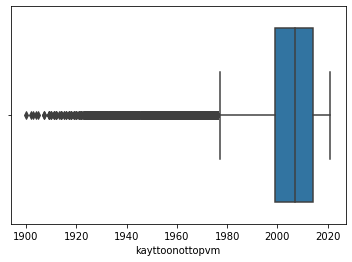

In [25]:
#detecting outliers with seaborn boxplot - these boxplots are not for visualizing dataset, they are for seeing the outliers
sns.boxplot(x=raw_data["kayttoonottopvm"])

#this looks now very reasonable

<AxesSubplot:xlabel='year'>

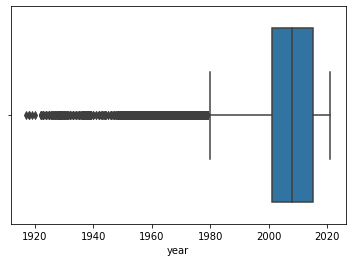

In [26]:
sns.boxplot(x=raw_data["year"])

<AxesSubplot:xlabel='omamassa'>

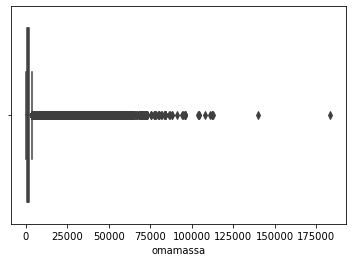

In [27]:
#any outliers in other columns?
sns.boxplot(x=raw_data["omamassa"])

In [28]:
#checking what are these two with mass over 125 000 kg
raw_data[raw_data.omamassa >125000]

,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,kayttoonottopvm,vari,ovienLukumaara,korityyppi,ohjaamotyyppi,omamassa,...,mallimerkinta,vaihteisto,vaihteidenLkm,kaupallinenNimi,kunta,Co2,matkamittarilukema,jarnro,year,tyyppi
1479400,MUU,1980-02-01,509.0,6.0,1980,NaN,NaN,NaN,NaN,140000.0,...,850-6X6/4120+1500,NaN,NaN,NaN,69.0,NaN,NaN,1479401,1980.0,other
4649454,O4,2019-02-15,14.0,6.0,2019,NaN,NaN,NaN,NaN,183500.0,...,NaN,NaN,NaN,NaN,853.0,NaN,NaN,4649455,2019.0,trailer


<AxesSubplot:xlabel='matkamittarilukema'>

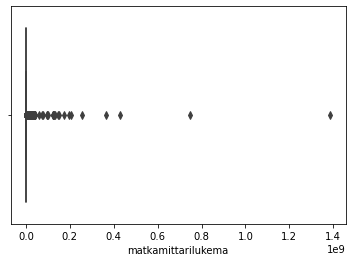

In [29]:
sns.boxplot(x=raw_data["matkamittarilukema"])

In [30]:
raw_data[raw_data.matkamittarilukema > 2000000]
#it's hard to know if these biggest values are wrong or not, with lorries they are ok

,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,kayttoonottopvm,vari,ovienLukumaara,korityyppi,ohjaamotyyppi,omamassa,...,mallimerkinta,vaihteisto,vaihteidenLkm,kaupallinenNimi,kunta,Co2,matkamittarilukema,jarnro,year,tyyppi
8,M1,2007-01-05,NaN,1.0,2007,2,NaN,AF,NaN,1660.0,...,5D RAV4 MPV 2.2 D-4D-ALA30L-AWFGYW-4X4/256,NaN,NaN,RAV4,694.0,173.0,2692651.0,9,2007.0,car_priv
928,M1,2003-02-07,NaN,1.0,2003,6,4.0,AF,1.0,1166.0,...,4D FUSION MPV 1.6-JU2/249,NaN,NaN,FUSION,139.0,160.0,2620120.0,929,2003.0,car_priv
1960,M1,1998-06-24,NaN,1.0,1998,2,NaN,AB,NaN,1235.0,...,4D GOLF 1.4-1J/250,NaN,NaN,GOLF,598.0,NaN,2089499.0,1961,1998.0,car_priv
3191,N1,2001-11-21,NaN,1.0,2001,Y,NaN,NaN,NaN,1810.0,...,HIACE VAN 2.5TD-KLH22L-RBMRYW/343,NaN,NaN,HIACE,430.0,NaN,3991203.0,3192,2001.0,van
4987,M1,1999-06-14,NaN,1.0,1999,0,NaN,NaN,1.0,1340.0,...,4D PRIMERA 2.0 HATCHBACK-FCAP11/260,NaN,NaN,NaN,405.0,NaN,2233658.0,4988,1999.0,car_priv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003674,N3,2020-04-04,118.0,6.0,2008,NaN,NaN,BC,1.0,10825.0,...,R620 Puoliper�vaunun vetoauto (BC) 15607cm3,1,6.0,R620,5.0,NaN,5191412.0,5003675,2020.0,lorry
5005855,N3,2020-08-14,125.0,1.0,2006,NaN,2.0,SG,1.0,14060.0,...,R500 2ov 15607cm3,1,6.0,R500,729.0,NaN,5132885.0,5005856,2020.0,lorry
5065914,M1,2020-09-03,NaN,1.0,2008,1,4.0,AC,NaN,1587.0,...,V70 Farmari (AC) 4ov 1999cm3,1,5.0,V70,240.0,206.0,2212630.0,5065915,2020.0,car_priv
5071718,M1,2020-09-22,NaN,1.0,2006,8,5.0,AC,NaN,1800.0,...,XC70 Farmari (AC) 5ov 2401cm3 A,2,6.0,XC70,638.0,224.0,2877689.0,5071719,2020.0,car_priv


<AxesSubplot:xlabel='Co2'>

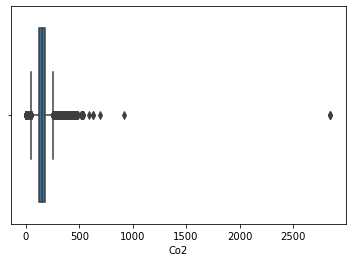

In [31]:
sns.boxplot(x=raw_data["Co2"])

In [32]:
raw_data[raw_data["Co2"] >1000]
#these are ok

,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,kayttoonottopvm,vari,ovienLukumaara,korityyppi,ohjaamotyyppi,omamassa,...,mallimerkinta,vaihteisto,vaihteidenLkm,kaupallinenNimi,kunta,Co2,matkamittarilukema,jarnro,year,tyyppi
4905296,N2,2019-10-30,NaN,1.0,2013,9,5.0,BB,1.0,2540.0,...,SPRINTER Umpikorinen (BB) 5ov 2987cm3 A,2,7.0,SPRINTER,837.0,2850.0,130422.0,4905297,2019.0,lorry
5091158,N2,2020-10-05,NaN,1.0,2018,9,5.0,BB,1.0,2356.0,...,Sprinter Umpikorinen (BB) 5ov 2143cm3,1,6.0,Sprinter,109.0,2850.0,44300.0,5091159,2020.0,lorry
5110273,N2,2020-11-12,NaN,1.0,2018,9,5.0,BB,1.0,2450.0,...,SPRINTER Umpikorinen (BB) 5ov 2143cm3,1,6.0,SPRINTER,853.0,2850.0,28603.0,5110274,2020.0,lorry


<AxesSubplot:xlabel='ajonKokPituus'>

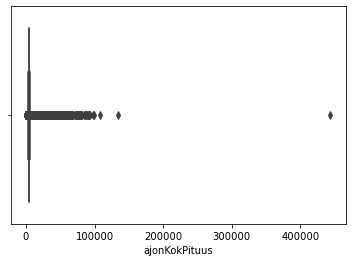

In [33]:
sns.boxplot(x=raw_data["ajonKokPituus"])

In [34]:
raw_data[raw_data["ajonKokPituus"] > 150000]
#the unit here is millimeter, so this palju-trailer is an outlier, dropping it out

,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,kayttoonottopvm,vari,ovienLukumaara,korityyppi,ohjaamotyyppi,omamassa,...,mallimerkinta,vaihteisto,vaihteidenLkm,kaupallinenNimi,kunta,Co2,matkamittarilukema,jarnro,year,tyyppi
4365510,O1,2017-05-26,1.0,1.0,2017,NaN,NaN,DC,NaN,190.0,...,NaN,NaN,NaN,ATF-Trailer 3000 Palju,678.0,NaN,NaN,4365511,2017.0,trailer


In [35]:
print(len(raw_data))
indexRows = raw_data[ (raw_data['ajonKokPituus'] >= 150000)].index
raw_data.drop(indexRows , inplace=True)
print(len(raw_data))

5111910
5111909


<AxesSubplot:xlabel='ajonLeveys'>

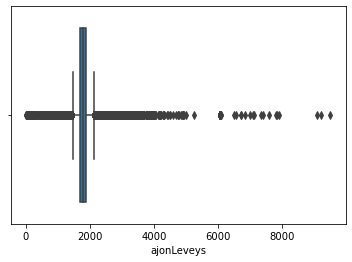

In [36]:
sns.boxplot(x=raw_data["ajonLeveys"])

In [37]:
raw_data[raw_data["ajonLeveys"] > 8000]

,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,kayttoonottopvm,vari,ovienLukumaara,korityyppi,ohjaamotyyppi,omamassa,...,mallimerkinta,vaihteisto,vaihteidenLkm,kaupallinenNimi,kunta,Co2,matkamittarilukema,jarnro,year,tyyppi
1182478,MUU,1981-12-03,510.0,1.0,1981,NaN,NaN,NaN,4.0,12800.0,...,55C-4X4/2880,NaN,NaN,NaN,111.0,NaN,NaN,1182479,1981.0,other
2515049,L3,2005-11-16,109.0,1.0,1981,NaN,NaN,NaN,NaN,150.0,...,NaN,NaN,NaN,NaN,444.0,NaN,NaN,2515050,2005.0,motorbike
3148936,L3e,2011-05-10,109.0,1.0,2001,NaN,NaN,NaN,4.0,370.0,...,NaN,7,NaN,K1200LT,743.0,NaN,NaN,3148937,2011.0,motorbike


In [38]:
#these two motorbikes are mistakes/outliers, the first is a crane, so it is ok -> dropping the motorbikes
indexRows = [2515049, 3148936]
raw_data.drop(indexRows , inplace=True)


In [39]:
len(raw_data)

5111907

<AxesSubplot:xlabel='ajonKorkeus'>

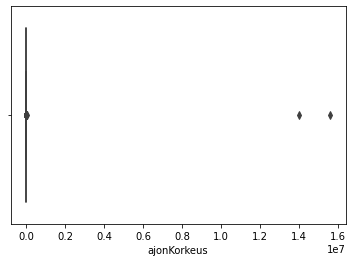

In [40]:
sns.boxplot(x=raw_data["ajonKorkeus"])

In [41]:
raw_data[raw_data["ajonKorkeus"]>1000000]
#these are outliers, probaply between values combined, dropping them


,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,kayttoonottopvm,vari,ovienLukumaara,korityyppi,ohjaamotyyppi,omamassa,...,mallimerkinta,vaihteisto,vaihteidenLkm,kaupallinenNimi,kunta,Co2,matkamittarilukema,jarnro,year,tyyppi
4824959,M1,2019-06-10,NaN,1.0,2014,2,2.0,AD,NaN,1735.0,...,E 220 BLUETEC Coup� (AD) 2ov 2143cm3 A,2,9.0,E 220 BLUETEC,977.0,120.0,11742.0,4824960,2019.0,car_priv
4933890,M1,2020-01-17,NaN,1.0,2019,9,4.0,AC,NaN,1760.0,...,Countryman Cooper SE ALL4 Farmari (AC) 4ov 149...,2,6.0,Countryman Cooper SE ALL4,734.0,NaN,7923.0,4933891,2020.0,car_priv


In [42]:
raw_data[raw_data["ajonKorkeus"]> 25000]
#this is "normal" tractor, so it is an outlier too

indexRows = raw_data[ (raw_data['ajonKorkeus'] >= 25000)].index
raw_data.drop(indexRows , inplace=True)
len(raw_data)

5111904

<AxesSubplot:xlabel='ajonKorkeus'>

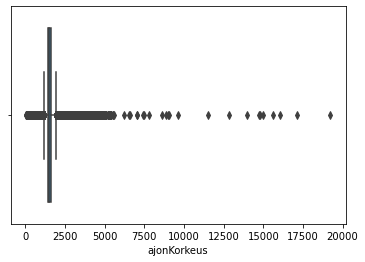

In [43]:
sns.boxplot(x=raw_data["ajonKorkeus"])

In [44]:
#Now data is preprocessed, ready to analyze it, let's save it to csv-file
raw_data.to_csv (r'vehicles_20.csv', header=True)

What kind of vehicles we have? Next phase is to analyze and visualize the dataset.